# TASK 6
# **Prediction using Decision Tree Algorithm**

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


importing data

In [85]:
data=pd.read_csv('/content/drive/My Drive/Iris.csv')
print(data.head())
print(data.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [88]:
data=data.drop("Id",axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [90]:
iris=data.copy()
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


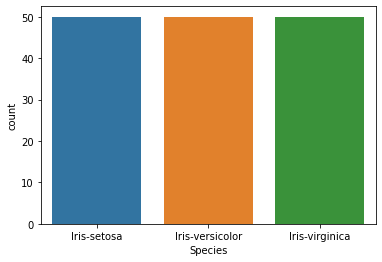

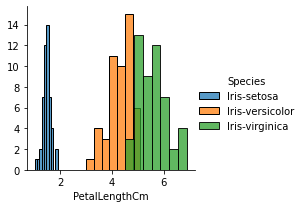

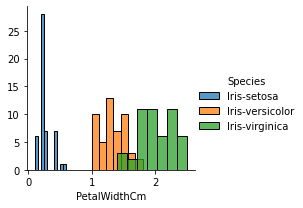

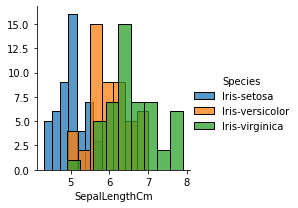

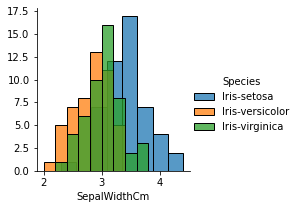

In [91]:
print(data['Species'].unique())
print(data['Species'].value_counts())
sns.countplot(x='Species',data=data)

sns.FacetGrid(data,hue="Species").map(sns.histplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species").map(sns.histplot,"PetalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species").map(sns.histplot,"SepalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species").map(sns.histplot,"SepalWidthCm").add_legend()
plt.show()


In [92]:
from sklearn import preprocessing
labels=preprocessing.LabelEncoder()
data['species']=labels.fit_transform(data['Species'])
print(data['species'].unique())

[0 1 2]


In [93]:
data=data.drop('Species',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
train=data.iloc[:,0:4]
train.shape

(150, 4)

In [95]:
test=data.iloc[:,4]
test.shape


(150,)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.33)

print(x_train.shape);print(x_test.shape)

(100, 4)
(50, 4)


In [97]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predictions=model.predict(x_test)

In [99]:
result=pd.DataFrame({"Actual":y_test,"Predicted":predictions})
result

,Actual,Predicted
52,1,1
106,2,1
62,1,1
69,1,1
50,1,1
45,0,0
118,2,2
70,1,2
110,2,2
113,2,2


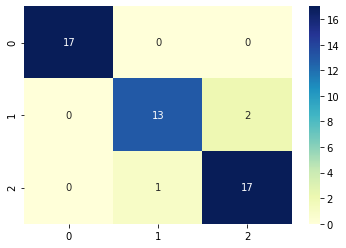

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
df = confusion_matrix(y_test, predictions)
sns.heatmap(df, annot=True, cmap="YlGnBu")

In [101]:
print("Accuracy of the model is:",accuracy_score(y_test,predictions)*100)
print(classification_report(y_test, predictions,digits=4))

Accuracy of the model is: 94.0
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     0.9286    0.8667    0.8966        15
           2     0.8947    0.9444    0.9189        18

    accuracy                         0.9400        50
   macro avg     0.9411    0.9370    0.9385        50
weighted avg     0.9407    0.9400    0.9398        50



# **Display Decision Tree**

In [102]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



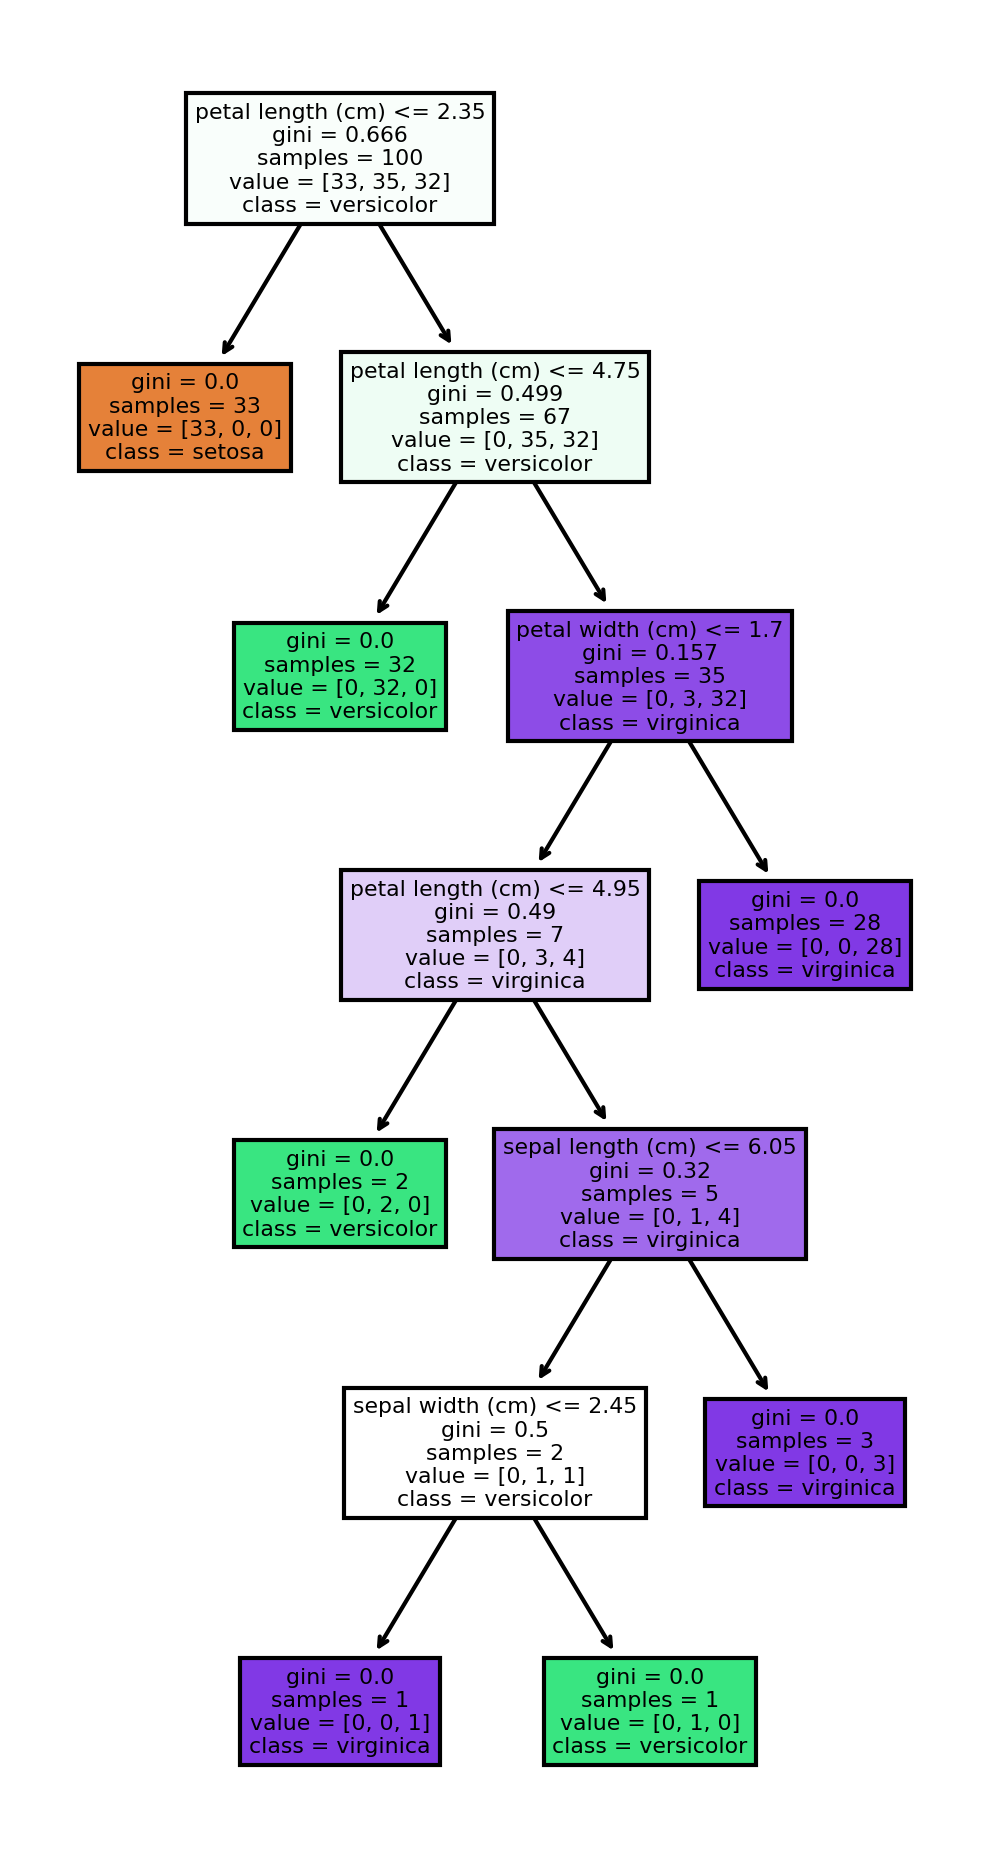

In [112]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,8), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);